# MIDI Numbers & Pitch

Suppose that two notes have frequencies $f_1$ and $f_2$, and a frequency ratio of $f_2/f_1$. An octave is a ratio of $2:1$, so the number of octaves between $f_2$ and $f_1$ is

$$
n_o = log_2(f_2/f_1)
$$

Now to divide the octave into smaller units. In equal temperament, where all semitones have the same frequency ratio of $2^{1/12}$, the conversion between note name and frequency is simple. First, one needs a reference note and frequency. This is usually A4, which is often set at $440\,Hz$. For a note that lies $n$ semitones higher (or $−n$ semitones lower), the frequency is then

$$f_n = 2^{n/12}*440\,Hz$$

With 12 being our dividing value, we get the 12 semitones used in western music.

Let's test it out and see if we can correctly determine the pitch of **C4**

In [1]:
import numpy as np

def get_freq_n_semitones(n):
    return 2**(n/12)*440

Since **C4** is 3 semitones (halfsteps) away from **A4**, we set `n` as 3 

In [2]:
get_freq_n_semitones(3)

523.2511306011972

523.25 is the frequency of **C4**.

Conversely, one can obtain n, the number of semitones from **A4**, from

$$n = 12*log_2(f_n/440\,Hz)$$

Similar equations give $n_o$, the number of octaves from **A4**, and $n_c$, the number of cents from **A4**:

$$n_o = log_2(f_n/440\,Hz)$$ and $$n_c = 1200*log_2(f_n/440\,Hz)$$

In [3]:
def get_n_from_freq(f):
    return round(12*np.log2(f/440),2)

In [4]:
get_n_from_freq(523.25)

3.0

In electronic music, pitch is often given by MIDI number: let's call it $m$ for our purposes. $m$ for the note **A4** is 69 and increases by one for each equal tempered semitone, so this gives us a simple conversion between frequencies and MIDI numbers (again using $440\,Hz$ as the pitch of **A4**):

$$m  =  12*log_2(f_m/440\,Hz) + 69$$
and
$$f_m  =  2^{(m−69)/12}(440\,Hz)$$

In [5]:
def get_midi_from_freq(f):
    return round(12*np.log2(f/440),2) + 69

In [6]:
get_midi_from_freq(523.25)

72.0

The notation used here is not universal: when different tuning systems are used, different names are applied.

![midi_chart.gif](midi_chart.gif)

**source:** https://newt.phys.unsw.edu.au/jw/notes.html

In [1]:
from scamp import *
import random

### Create a new Session and Play a 3 notes in a scale

In [8]:
s = Session()
s.tempo = 128

piano = s.new_part("piano")

piano.play_note(21.5, 1, 1.0)
piano.play_note(21, 1, 1.0)
piano.play_note(21.9, 1, 1.0)

Using preset Piano Merlin for piano


### Repeat to play a notes in the Fm Scale

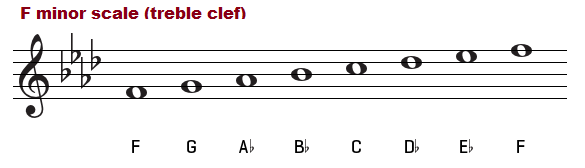

In [9]:
Fm = {"F": 65, 
     "G": 67,
     "Ab": 68,
     "Bb": 70,
     "C": 72,
     "Db": 73,
     "Eb": 75,
     "F2": 77
    }

#### Play a Random Melody in Fm

In [10]:
s = Session()
s.tempo = 128

piano = s.new_part("piano")

piano.play_note(Fm['F'] - 12, 1, .5)
piano.play_note(Fm['Ab'] - 12, 1, .5)
piano.play_note(Fm['C'] - 12, 1, .5)
piano.play_note(Fm['Bb'] - 12, 1, 1.0)
piano.play_note(Fm['Ab'] - 12, 1, 1.0)
piano.play_note(Fm['C'] - 12, 1, .5)
piano.play_note(Fm['G'] - 12, 1, .5)
piano.play_note(Fm['F'] - 12, 1, 1.0)

Using preset Piano Merlin for piano


#### Play the Fm Scale

In [11]:
Fm.values()

dict_values([65, 67, 68, 70, 72, 73, 75, 77])

In [12]:
s = Session()
s.tempo = 128

piano = s.new_part("piano")

for m in Fm.values():
    piano.play_note(m, 1, .5)

Using preset Piano Merlin for piano


### Create Notes in Dastgahe Shur
Shur شور (C D Ep F G A/Ap Bb C) (Do Re Mi Fa Sol La Si Do)

Flats are shown with a b, and koron (half flats) are designated with a p

To determine the equivalent MIDI values, the frequencies of the notes must first be determined, and then the MIDI value can be derived.

**E4** is 7 half-steps up from **A4** ($440\,Hz$) and **Ep** is -.5 halfsteps from **E** (i.e. a quarter-tone), therefore `n = 6.5`

In [13]:
get_n_from_freq(659.26)

7.0

In [14]:
get_midi_from_freq(get_freq_n_semitones(6.5))

75.5

In [15]:
shur = {"C": 72,
        "D": 74,
        "Ep": 75.5,
        "F": 77,
        "G": 79,
        "Ap": 80.5,
        "Bb": 82,
        "C": 83 
        }

In [16]:
root = 72

In [17]:
s = Session()
s.tempo = 128

piano = s.new_part("piano")

for m in shur.values():
    piano.play_note(m, 1, .5)

Using preset Piano Merlin for piano


### Generate A Melody in Shur

In [18]:
shur_m = list(shur.values())

In [19]:
shur_m.sort()

In [20]:
shur_m

[74, 75.5, 77, 79, 80.5, 82, 83]

In [21]:
s = Session()
s.tempo = 128

piano = s.new_part("piano")

for m in shur_m:
    piano.play_note(m, 1, .5)

Using preset Piano Merlin for piano


In [ ]:
shur = {"C": 72,
        "D": 74,
        "Ep": 75.5,
        "F": 77,
        "G": 79,
        "Ap": 80.5,
        "Bb": 82,
        }
shur_m = list(shur.values())
shur_m.sort()

s = Session()
s.tempo = 160

piano = s.new_part("violin")

index = random.randint(0, len(shur_m))
octave_shift = 0

piano.play_note(shur_m[index] + octave_shift*12, random.randrange(8, 10)*.1, .5)
for i in range(16 * 4):
    print(index)
    index += random.randint(-2, 2)
    if random.random() < .25:
        time = 1
    else:
        time = random.randrange(4, 6)*.1 
    piano.play_note(shur_m[index] + octave_shift*12, random.randrange(8, 10)*.1, time)

### Playing a Common Gusheh

In [2]:
s = Session()
s.tempo = 100

piano = s.new_part("piano")
octave = -3

piano.play_note(77 + octave*12, 1, .33)
piano.play_note(82 + octave*12, 1, .33)
piano.play_note(82 + octave*12, 1, .33)

piano.play_note(75.5 + octave*12, 1, .33)
piano.play_note(82 + octave*12, 1, .33)
piano.play_note(82 + octave*12, 1, .33)

piano.play_note(74 + octave*12, 1, .33)
piano.play_note(82 + octave*12, 1, .33)
piano.play_note(82 + octave*12, 1, .33)

piano.play_note(72 + octave*12, 1, .33)
piano.play_note(82 + octave*12, 1, 1)

shur = {"C": 72,
        "D": 74,
        "Ep": 75.5,
        "F": 77,
        "G": 79,
        "Ap": 80.5,
        "Bb": 82,
        }

Using preset Piano Merlin for piano


In [26]:
list(shur.values())

[72, 74, 75.5, 77, 79, 80.5, 82]

In [27]:
shur = list(shur.values())

#### Add 3 octaves below and above

In [ ]:
shur = [s - 36 for s in shur] + [s - 24 for s in shur] + [s - 12 for s in shur] + shur + [s + 12 for s in shur] + [s + 24 for s in shur]

In [29]:
shur[3]

41

In [3]:
s = Session()
s.tempo = 100

piano = s.new_part("timpani")
octave = -2

shur = {"C": 72,
        "D": 74,
        "Ep": 75.5,
        "F": 77,
        "G": 79,
        "Ap": 80.5,
        "Bb": 82,
        }
shur = list(shur.values())
shur = [s - 36 for s in shur] + [s - 24 for s in shur] + [s - 12 for s in shur] + shur + [s + 12 for s in shur] + [s + 24 for s in shur]

n = 20
while True:
    n = n + random.randint(-1, 1)
    for i in range(2):
        # 3 steps
        piano.play_note(shur[n] + octave*12, 1, .33)
        piano.play_note(shur[n+3] + octave*12, .5, .33)
        piano.play_note(shur[n+3] + octave*12, .5, .33)

        # 4 steps
        piano.play_note(shur[n-1] + octave*12,  1, .33)
        piano.play_note(shur[n+3] + octave*12, .5, .33)
        piano.play_note(shur[n+3] + octave*12, .5, .33)

        # 5 steps
        piano.play_note(shur[n-2] + octave*12, 1, .33)
        piano.play_note(shur[n+3] + octave*12, .5, .33)
        piano.play_note(shur[n+3] + octave*12, .5, .33)

        # 6 steps
        piano.play_note(shur[n-3] + octave*12, 1, .33)
        piano.play_note(shur[n+3] + octave*12, 1, .67)

Using preset Timpani Half for timpani


KeyboardInterrupt: 

## Next Steps

* introduce the different characteristics outlined [here](https://en.wikipedia.org/wiki/Dastg%C4%81h-e_%C5%A0ur) 